In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("C:/Users/nisar/Desktop/udemy/Simplilearn/Course Material/DL_with_Keras_ and_Tensorflow/My Data/jupyter files/Credit.csv")

In [3]:
df.head()

,Credit,RevolvingUtiOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NoOfDependents,NoRealEstateLoansOrLines,NoOfOpenCreditLinesAndLoans,NoofTime30_59DaysPastDue,NoOfTime60_89DaysPastDue,NorOfTimes90DaysLate
0,1,0.766127,45,0.802982,9120,2,6,13,2,0,0
1,0,0.957151,40,0.121876,2600,1,0,4,0,0,0
2,0,0.658180,38,0.085113,3042,0,0,2,1,0,1
3,0,0.233810,30,0.036050,3300,0,0,5,0,0,0
4,0,0.907239,49,0.024926,63588,0,1,7,1,0,0


In [4]:
df.Credit.value_counts()

0    7509
1     517
Name: Credit, dtype: int64

In [5]:
df.Credit.value_counts()*100/df.shape[0]

0    93.558435
1     6.441565
Name: Credit, dtype: float64

In [6]:
x=df.iloc[:,1:]
y=df.Credit

In [7]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=2)

In [8]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [9]:
x_train_std.shape

(6420, 10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Input
from tensorflow.keras.metrics import Precision, Recall
from livelossplot import PlotLossesKerasTF

In [31]:
model=Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
model.fit(x_train_std,y_train,epochs=50, batch_size=100,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

# Handling Data Imbalance

In [12]:
x=df.iloc[:,1:]
y=df.Credit

In [13]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [14]:
x=df.iloc[:,1:]
y=df.Credit

# Random Oversampling

In [15]:
from imblearn.over_sampling import RandomOverSampler

In [16]:
ro=RandomOverSampler()
x_train_oversampled,y_train_oversampled=ro.fit_resample(x,y)

In [17]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_oversampled)))


Original dataset shape Counter({0: 7509, 1: 517})
Resampled dataset shape Counter({1: 7509, 0: 7509})


In [18]:
print(x_train_oversampled.shape)
print(y_train_oversampled.shape)

(15018, 10)
(15018,)


In [19]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split( x_train_oversampled,y_train_oversampled, test_size=0.2, random_state=2)

In [20]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

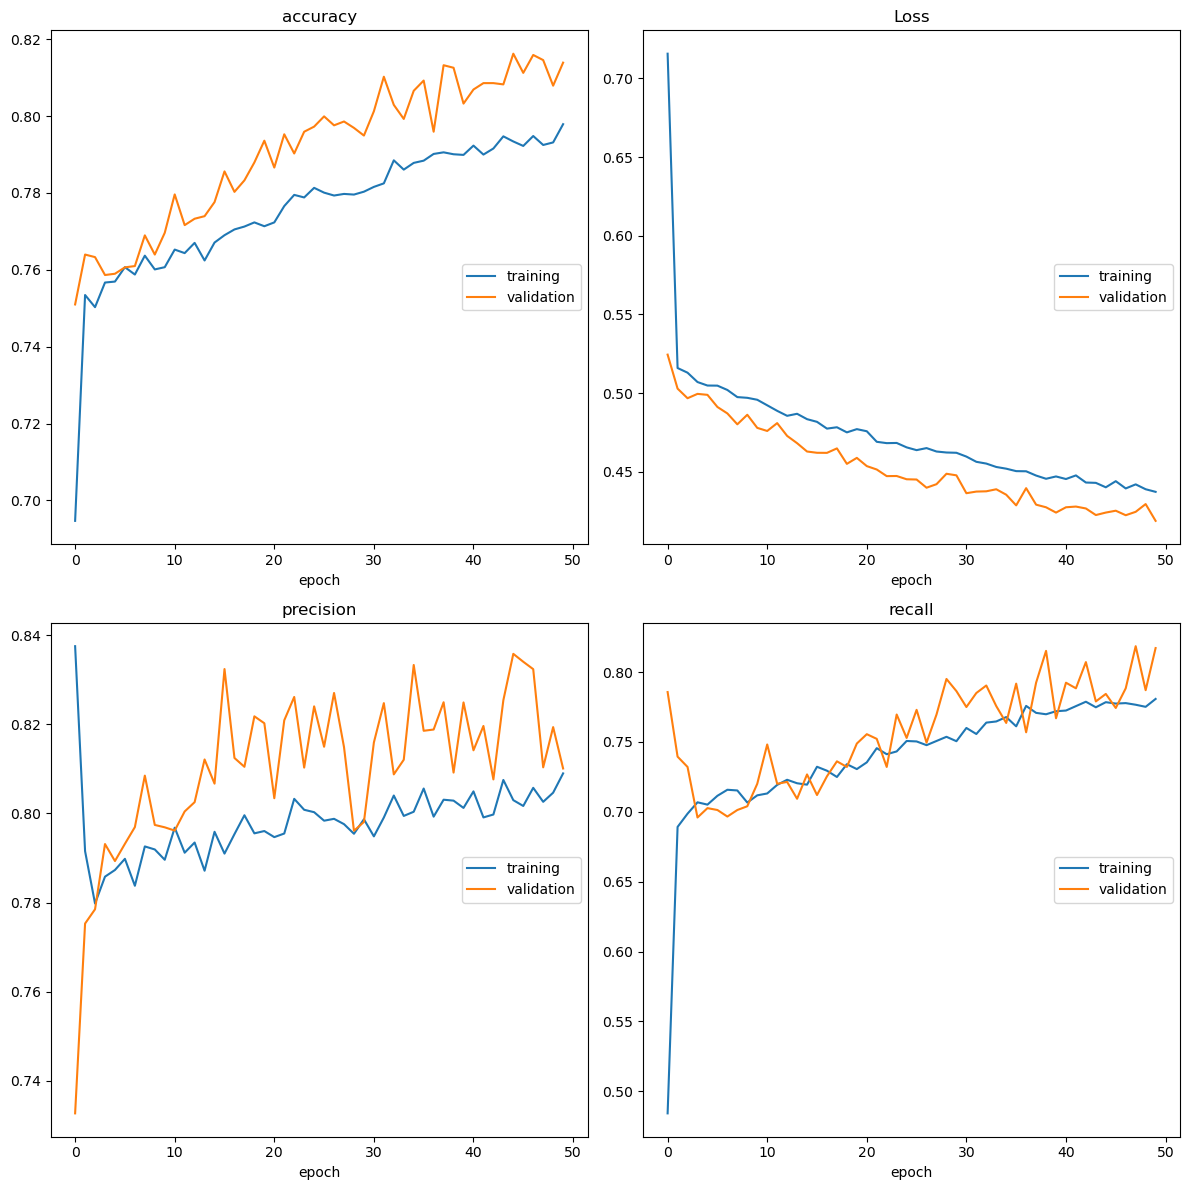

accuracy
	training         	 (min:    0.695, max:    0.798, cur:    0.798)
	validation       	 (min:    0.751, max:    0.816, cur:    0.814)
Loss
	training         	 (min:    0.437, max:    0.716, cur:    0.437)
	validation       	 (min:    0.419, max:    0.524, cur:    0.419)
precision
	training         	 (min:    0.780, max:    0.838, cur:    0.809)
	validation       	 (min:    0.733, max:    0.836, cur:    0.810)
recall
	training         	 (min:    0.484, max:    0.781, cur:    0.781)
	validation       	 (min:    0.696, max:    0.818, cur:    0.817)
121/121 [==============================] - 1s 9ms/step - loss: 0.4372 - accuracy: 0.7979 - precision: 0.8090 - recall: 0.7808 - val_loss: 0.4187 - val_accuracy: 0.8139 - val_precision: 0.8101 - val_recall: 0.8171


In [21]:
model.fit(x_train_std,y_train,epochs=50, batch_size=100,validation_data=(x_test_std,y_test),
          callbacks=[PlotLossesKerasTF()])

# SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(x,y)

In [28]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smote)))

Original dataset shape Counter({0: 7509, 1: 517})
Resampled dataset shape Counter({1: 7509, 0: 7509})


In [29]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(15018, 10)
(15018,)


In [24]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.2, random_state=2)

In [25]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

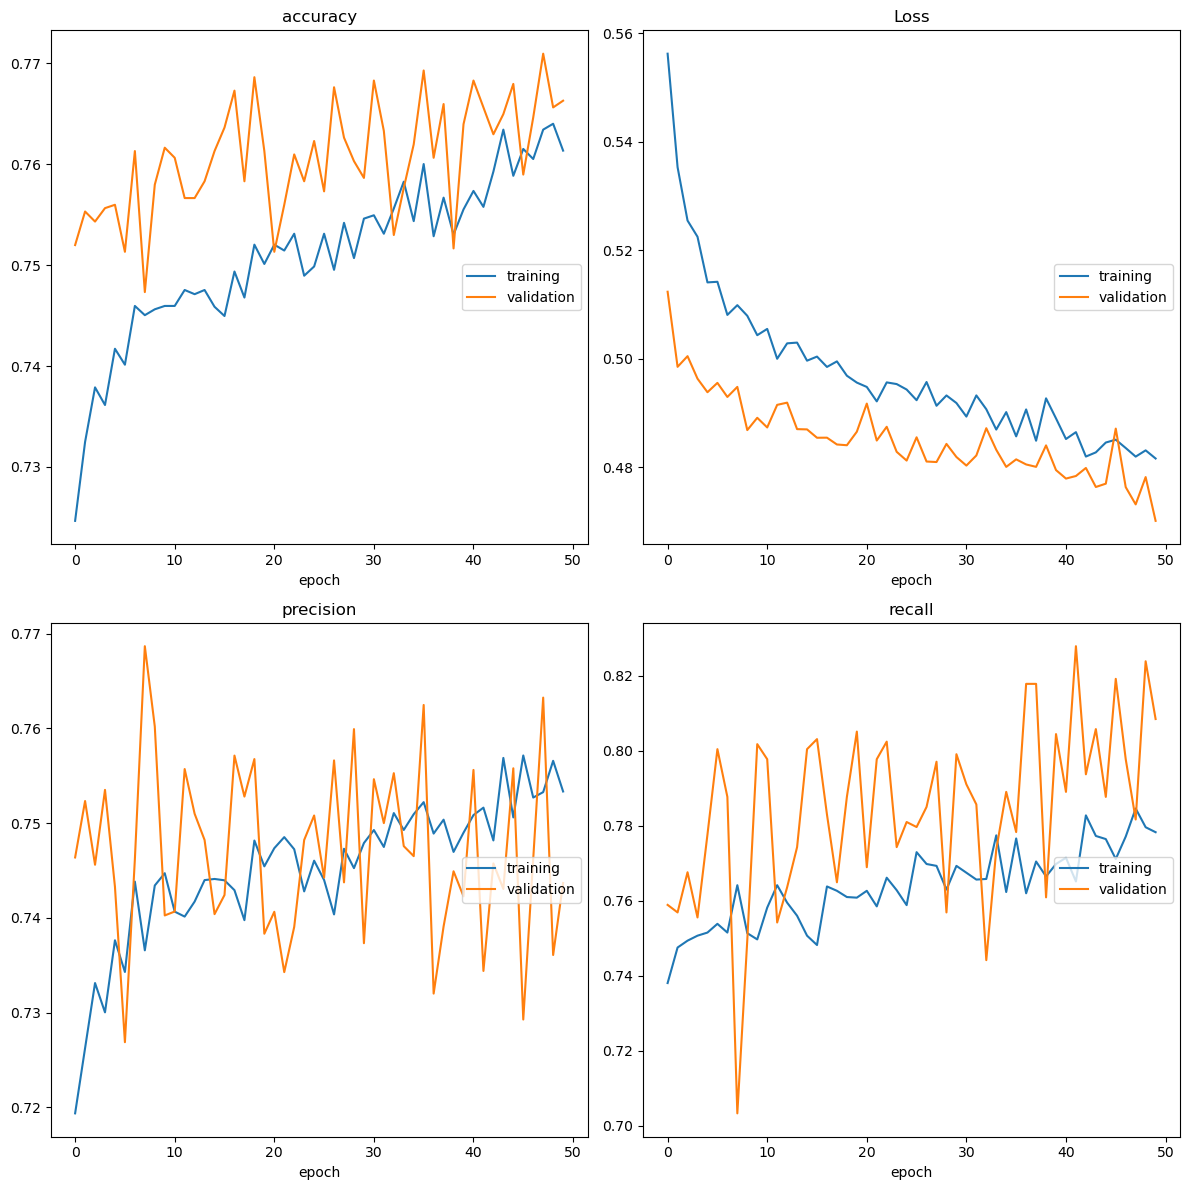

accuracy
	training         	 (min:    0.725, max:    0.764, cur:    0.761)
	validation       	 (min:    0.747, max:    0.771, cur:    0.766)
Loss
	training         	 (min:    0.482, max:    0.556, cur:    0.482)
	validation       	 (min:    0.470, max:    0.512, cur:    0.470)
precision
	training         	 (min:    0.719, max:    0.757, cur:    0.753)
	validation       	 (min:    0.727, max:    0.769, cur:    0.744)
recall
	training         	 (min:    0.738, max:    0.785, cur:    0.778)
	validation       	 (min:    0.703, max:    0.828, cur:    0.808)
121/121 [==============================] - 1s 10ms/step - loss: 0.4816 - accuracy: 0.7614 - precision: 0.7533 - recall: 0.7783 - val_loss: 0.4701 - val_accuracy: 0.7663 - val_precision: 0.7437 - val_recall: 0.8084


In [26]:

model.fit(x_train_std,y_train,epochs=50, batch_size=100,validation_data=(x_test_std,y_test),
          callbacks=[PlotLossesKerasTF()])
